In [60]:
#Imports Packages
import pandas as pd
import numpy as np
import xgboost as xgb

import sklearn
import sklearn.datasets
import sklearn.ensemble

from sklearn.ensemble import AdaBoostClassifier

#!pip install lime
import lime
import lime.lime_tabular
from __future__ import print_function

#Functions for xgboost
from numpy import loadtxt
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm


#!pip install eli5
#from sklearn.feature_extraction import DictVectorizer
#from sklearn.pipeline import make_pipeline



In [62]:
#Select appropriate column names as features. Omit encounterID as does not influence modeling
colnames = ['age','edVisitCountPast3months','admissionMonth','admissionBetweenThuAndSat',
            'edTimeBeforeAdmission','sex','ethnicity','admitSource','meanLOSPast24months','inpatientAdmitCountPast3months',
            'meanTemperaturePast12months','inpatientAdmitCountPast6months','inpatientAdmitCountPast12months',
            'hospitalAdmitCountPast3months','hospitalAdmitCountPast6months','edVisitCountPast6months',
            'medianTemperaturePast12months','meanHeartRatePast12months','actualLOS']

In [63]:
data = pd.read_csv("mimicLOSKenSciFeaturesData.csv")

In [64]:
#Creates subset with appropriate column names. 
#Fill categorical column with Short LOS and Long LOS. Short LOS if acutalLOS <= 5, Long LOS if >= 5

subset = data[colnames]
subset['catLOS'] = 'Long LOS'
subset.loc[(subset['actualLOS'] > 0) & (subset['actualLOS'] <= 5), 'catLOS'] = 'Short LOS'
subset.loc[(subset['actualLOS'] > 5), 'catLOS'] = 'Long LOS'


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [78]:
#Combine Ethnicities into generalized groups
combineEthn = subset.copy()
combineEthn.loc[combineEthn['ethnicity'].str.contains('HISPANIC'), 'ethnicity'] = 'HISPANIC/LATINO'
combineEthn.loc[combineEthn['ethnicity'].str.contains('ASIAN'), 'ethnicity'] = 'ASIAN'
combineEthn.loc[combineEthn['ethnicity'].str.contains('PACIFIC'), 'ethnicity'] = 'ASIAN'
combineEthn.loc[combineEthn['ethnicity'].str.contains('WHITE'), 'ethnicity'] = 'WHITE'
combineEthn.loc[combineEthn['ethnicity'].str.contains('AMERICAN'), 'ethnicity'] = 'WHITE'
combineEthn.loc[combineEthn['ethnicity'].str.contains('PORTUGUESE'), 'ethnicity'] = 'WHITE'
combineEthn.loc[combineEthn['ethnicity'].str.contains('BLACK'), 'ethnicity'] = 'BLACK'
combineEthn.loc[combineEthn['ethnicity'].str.contains('DECLINED'), 'ethnicity'] = 'OTHER'
combineEthn.loc[combineEthn['ethnicity'].str.contains('UNKNOWN'), 'ethnicity'] = 'OTHER'
combineEthn.loc[combineEthn['ethnicity'].str.contains('OBTAIN'), 'ethnicity'] = 'OTHER'
combineEthn.loc[combineEthn['ethnicity'].str.contains('MULTI'), 'ethnicity'] = 'OTHER'
combineEthn.loc[combineEthn['ethnicity'].str.contains('CARIBBEAN'), 'ethnicity'] = 'BLACK' #Not sure


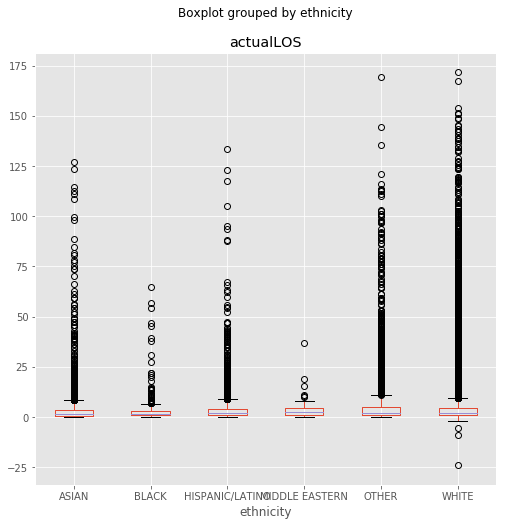

In [91]:
import matplotlib.pyplot as plt
#import ggplot
#from ggplot import diamonds
matplotlib.style.use('ggplot')       # Use ggplot style plots*


# plt.plot( '', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()

combineEthn.boxplot(column="actualLOS",        # Column to plot
                 by= "ethnicity",         # Column to split upon
                 figsize= (8,8))        # Figure size

# fig, ax = plt.subplots()
# combineEthn['ethnicity'].value_counts().plot(ax=ax, kind='line')

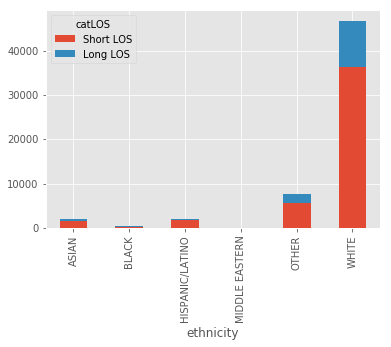

In [92]:
#Creates Stacked Bar chart showing number of people with Short LOS and Long LOS per ethnic group
import matplotlib.pyplot as plt

combineEthn = combineEthn.groupby(['ethnicity', 'catLOS'])['ethnicity'].count().unstack('catLOS').fillna(0)
combineEthn[['Short LOS','Long LOS']].plot(kind='bar', stacked=True)

In [ ]:
subset.catLOS.value_counts()

In [77]:
combineEthn.head()

catLOS,Long LOS,Short LOS
ethnicity,,
ASIAN,380,1638
BLACK,52,279
HISPANIC/LATINO,447,1677
MIDDLE EASTERN,10,33
OTHER,1991,5651
